In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import config
config.experimental_run_functions_eagerly(True)

from tensorflow.keras.preprocessing.image import load_img , ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , BatchNormalization , Flatten , Dropout , InputLayer

import tensorflow as tf

In [3]:
img_dir = 'dataset/Brain Tumor Data Set/'

In [4]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [5]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE , IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        color_mode='grayscale',
                                        shuffle=True,
                                        class_mode='binary',
                                        subset='training'
                                        )

Found 3681 images belonging to 2 classes.


In [7]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE , IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        color_mode='grayscale',
                                        shuffle=True,
                                        class_mode='binary',
                                        subset='validation'
                                        )

Found 919 images belonging to 2 classes.


In [8]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain Tumor', 'Healthy']


In [9]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1 , activation='sigmoid'))

C:\Users\amin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,239,489 (81.02 MB)

 Trainable params: 21,239,489 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
with tf.device('/gpu:0'):
    history = model.fit(train_gen,verbose=1,epochs=5,validation_data=val_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 591ms/step - accuracy: 0.9908 - loss: 0.0369 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0291 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 579ms/step - accuracy: 0.9970 - loss: 0.0159 - val_accuracy: 0.9933 - val_loss: 0.0211
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 581ms/step - accuracy: 0.9992 - loss: 0.0135 - val_accuracy: 0.9989 - val_loss: 0.0155


In [20]:
test_loss, test_acc   = model.evaluate(val_gen)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9995 - loss: 0.0137


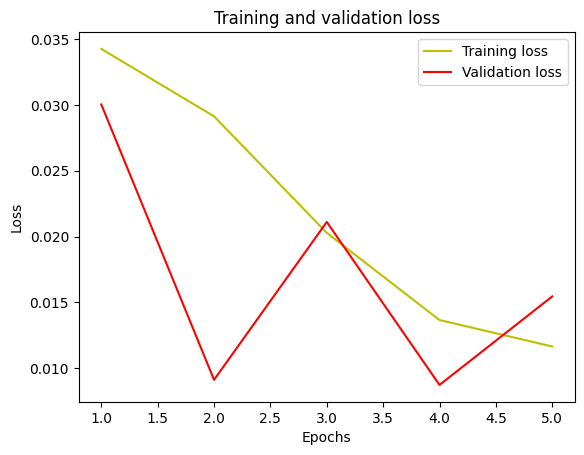

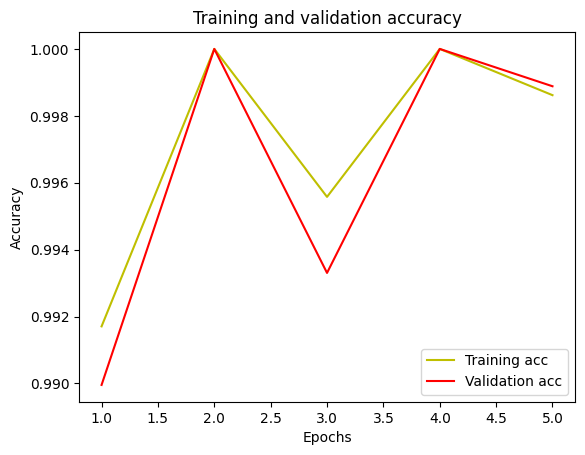

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.save('model.h5')